# Exploratory Data Analysis (EDA)

In [41]:
url='https://raw.githubusercontent.com/ShilpaSayuraML/DS-ML-Course/main/data/employees.csv'

In [42]:
import pandas as pd
import numpy as np
# read datasdet using pandas
df = pd.read_csv(url)
df.head()


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [43]:
df.shape


(1000, 8)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [45]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [46]:
df.describe(include ='all')

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
count,933,855,1000,1000,1000.000000,1000.000000,933,957
unique,200,2,972,720,NaN,NaN,2,10
top,Marilyn,Female,10/30/1994,1:35 PM,NaN,NaN,True,Client Services
freq,11,431,2,5,NaN,NaN,468,106
mean,NaN,NaN,NaN,NaN,90662.181000,10.207555,NaN,NaN
std,NaN,NaN,NaN,NaN,32923.693342,5.528481,NaN,NaN
min,NaN,NaN,NaN,NaN,35013.000000,1.015000,NaN,NaN
25%,NaN,NaN,NaN,NaN,62613.000000,5.401750,NaN,NaN
50%,NaN,NaN,NaN,NaN,90428.000000,9.838500,NaN,NaN
75%,NaN,NaN,NaN,NaN,118740.250000,14.838000,NaN,NaN


In [47]:
#change data type
# convert "Start Date" column to datetime data type
df['Start Date'] = pd.to_datetime(df['Start Date'])
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1984-01-31,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,2013-05-20,12:39 PM,96914,1.421,False,Product
998,Larry,Male,2013-04-20,4:45 PM,60500,11.985,False,Business Development


In [48]:
#numbrr of unique elements
df.nunique()


First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

## Handling Missing Values


In [49]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [50]:
#fill missing values
df["Gender"].fillna("No Gender", inplace = True)

df.isnull().sum()


First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [51]:
#fill senior management with mode value
mode = df['Senior Management'].mode().values[0]
df['Senior Management']= df['Senior Management'].replace(np.nan, mode)

df.isnull().sum()


First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [52]:
#drop all rows having missing values
print(df.shape)
df = df.dropna(axis = 0, how ='any')

print(df.isnull().sum())
df.shape


(1000, 8)
First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


(899, 8)

## Data Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder
# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the "Senior Management"
# column with LabelEncoder
df['Gender'] = le.fit_transform(df['Gender'])
df

<ipython-input-53-ec804532f41d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,1,1993-08-06,12:42 PM,97308,6.945,True,Marketing
2,Maria,0,1993-04-23,11:17 AM,130590,11.858,False,Finance
3,Jerry,1,2005-03-04,1:00 PM,138705,9.340,True,Finance
4,Larry,1,1998-01-24,4:47 PM,101004,1.389,True,Client Services
5,Dennis,1,1987-04-18,1:35 AM,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
995,Henry,2,2014-11-23,6:09 AM,132483,16.655,False,Distribution
996,Phillip,1,1984-01-31,6:30 AM,42392,19.675,False,Finance
997,Russell,1,2013-05-20,12:39 PM,96914,1.421,False,Product
998,Larry,1,2013-04-20,4:45 PM,60500,11.985,False,Business Development


## Data Visualization

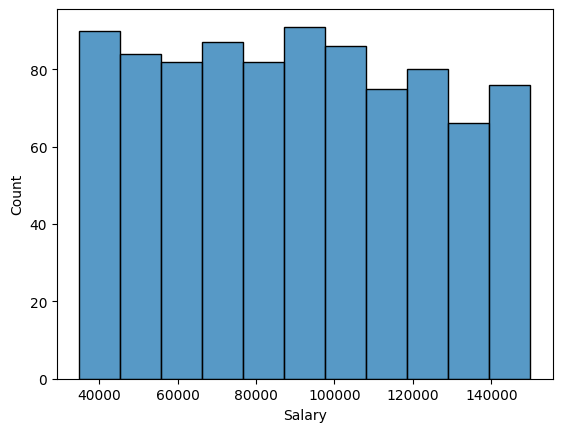

In [54]:
# histigram
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(x='Salary', data=df, )
plt.show()


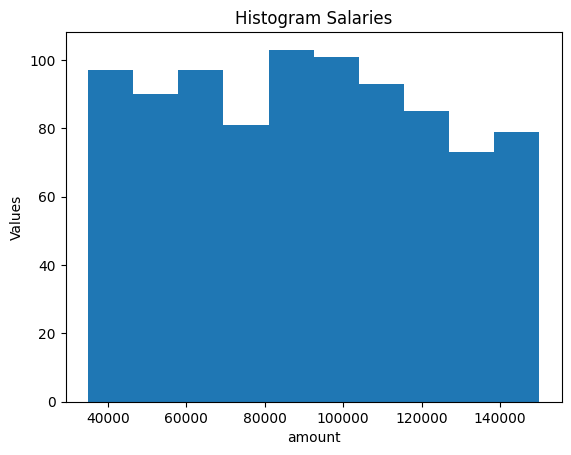

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the bar plot
plt.hist(df['Salary'])

# Adding labels and title
plt.xlabel('amount')
plt.ylabel('Values')
plt.title('Histogram Salaries')

# Display the plot
plt.show()


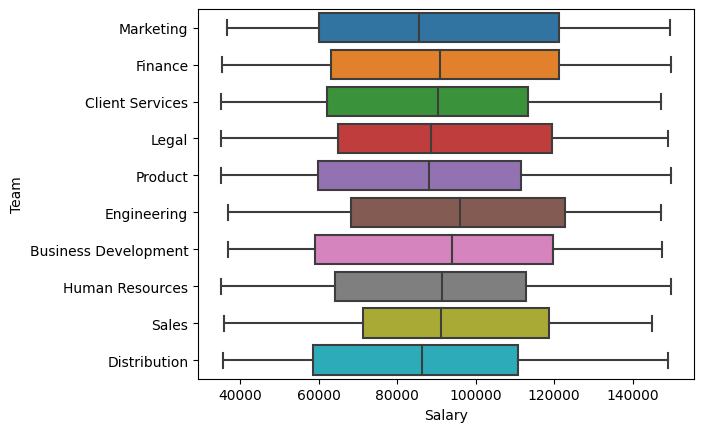

In [56]:
#bi variate analysis
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot( x="Salary", y='Team', data=df, )
plt.show()


https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/